In [2]:
# cnn model for financial quantitative investment




import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import yfinance as yf

start_date = "2001-01-01"
end_date = "2020-01-01"
ticker = "^GSPC"  # S&P 500

# Downloading data
df = yf.download(ticker, start=start_date, end=end_date)

# Drop any rows with missing values
df = df.dropna()

# Convert non-numeric columns to numeric (if any)
non_numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in non_numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values after conversion
df = df.dropna()

# Define the target variable
df['Target'] = (df['Close'] > df['Close'].shift(1)).astype(int)

# Split the dataset into features and target
X = df[['Open', 'High', 'Low', 'Close', 'Volume']].values
y = df['Target'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape input data
X = X.reshape(-1, 1, 5, 1) 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CNN architecture
cnn_model = Sequential([
    Conv2D(32, (1, 3), activation='relu', input_shape=(1, 5, 1)),
    MaxPooling2D((1, 2)),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)


[*********************100%%**********************]  1 of 1 completed
C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5398 - loss: 0.6912 - val_accuracy: 0.5042 - val_loss: 0.6924
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5295 - loss: 0.6911 - val_accuracy: 0.5335 - val_loss: 0.6905
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5458 - loss: 0.6879 - val_accuracy: 0.5335 - val_loss: 0.6899
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5467 - loss: 0.6882 - val_accuracy: 0.5397 - val_loss: 0.6897
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5481 - loss: 0.6888 - val_accuracy: 0.5335 - val_loss: 0.6891
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5398 - loss: 0.6904 - val_accuracy: 0.5439 - val_loss: 0.6889
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5499 - loss: 0.6877 - val_accuracy: 0.5439 - val_loss: 0.6889
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5462 - loss: 0.6878 - val_accu

In [3]:
# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print("Test Accuracy (CNN):", test_accuracy)

# Save the model
cnn_model.save("cnn_model.h5")

# Predict transitions
test_predictions = (cnn_model.predict(X_test) > 0.5).astype(int).flatten()

# Calculate transitions
rise_to_rise = np.sum((y_test == 1) & (test_predictions == 1))
rise_to_fall = np.sum((y_test == 1) & (test_predictions == 0))
fall_to_rise = np.sum((y_test == 0) & (test_predictions == 1))
fall_to_fall = np.sum((y_test == 0) & (test_predictions == 0))

# Print transitions
print("Transitions:")
print(f"Rise to Rise: {rise_to_rise}")
print(f"Rise to Fall: {rise_to_fall}")
print(f"Fall to Rise: {fall_to_rise}")
print(f"Fall to Fall: {fall_to_fall}")
# Calculate rise and fall instances in the test data
rise_count = np.sum(y_test == 1)
fall_count = np.sum(y_test == 0)

# Print the number of rise and fall instances
print("Rise instances in test data:", rise_count)
print("Fall instances in test data:", fall_count)


# Calculate correctly predicted instances
correct_predictions = np.sum(test_predictions == y_test)
total_instances = len(y_test)

# Calculate accuracy
accuracy = correct_predictions / total_instances
print(f"Correctly predicted instances: {correct_predictions} out of {total_instances}")
print(f"Accuracy: {accuracy}")


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8293 - loss: 0.4372 


Test Accuracy (CNN): 0.8284518718719482
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Transitions:
Rise to Rise: 396
Rise to Fall: 114
Fall to Rise: 50
Fall to Fall: 396
Rise instances in test data: 510
Fall instances in test data: 446
Correctly predicted instances: 792 out of 956
Accuracy: 0.8284518828451883


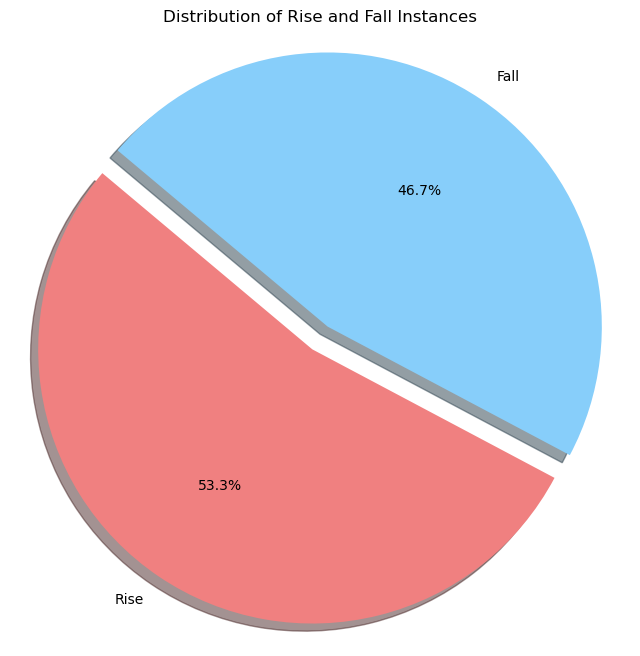

In [5]:
import matplotlib.pyplot as plt
# Plot the pie chart
labels = ['Rise', 'Fall']
sizes = [rise_count, fall_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice (Rise)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Rise and Fall Instances')
plt.show()

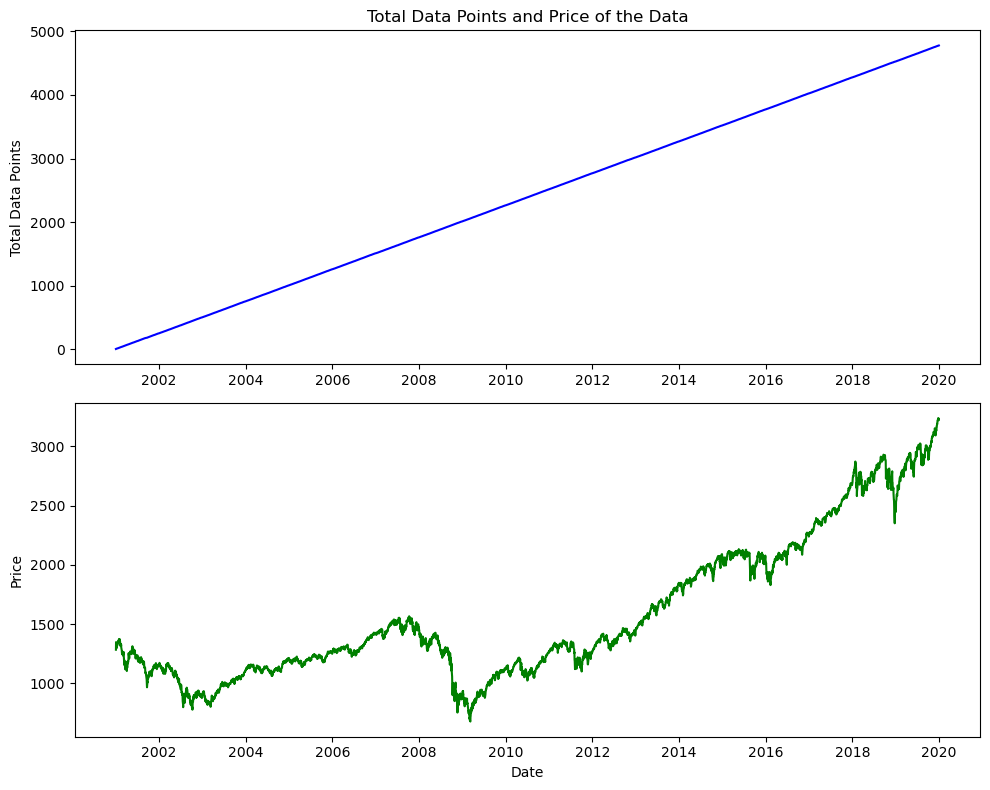

In [7]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the total number of data points
ax1.plot(df.index, range(1, len(df) + 1), color='blue')
ax1.set_ylabel('Total Data Points')
ax1.set_title('Total Data Points and Price of the Data')

# Plot the price of the data
ax2.plot(df.index, df['Close'], color='green')
ax2.set_ylabel('Price')
ax2.set_xlabel('Date')

plt.tight_layout()
plt.show()

In [ ]:
#deep learning with cnn

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import BernoulliRBM
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.optimizers import Adam
import yfinance as yf


start_date = "2001-01-01"
end_date = "2020-01-01"
ticker = "^GSPC"  # S&P 500

# Downloading data
df = yf.download(ticker, start=start_date, end=end_date)

# Drop any rows with missing values
df = df.dropna()

# Convert non-numeric columns to numeric (if any)
non_numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in non_numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values after conversion
df = df.dropna()

# Define the target variable
df['Target'] = (df['Open'] > df['Open'].shift(1)).astype(int)

# Split the dataset into features and target
X = df[['Open', 'High', 'Low', 'Close', 'Volume']].values
y = df['Target'].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Deep Belief Network (DBN) Training
# Initialize and train the first layer RBM
rbm1 = BernoulliRBM(n_components=100, learning_rate=0.1, n_iter=100, random_state=42, verbose=True)
rbm1.fit(X_train)

# Transform the training and test sets using the trained RBM
X_train_rbm1 = rbm1.transform(X_train)
X_test_rbm1 = rbm1.transform(X_test)

# Initialize and train the second layer RBM
rbm2 = BernoulliRBM(n_components=100, learning_rate=0.1, n_iter=100, random_state=42, verbose=True)
rbm2.fit(X_train_rbm1)

# Transform the training and test sets using the trained RBM
X_train_rbm2 = rbm2.transform(X_train_rbm1)
X_test_rbm2 = rbm2.transform(X_test_rbm1)

# Initialize and train the third layer RBM
rbm3 = BernoulliRBM(n_components=40, learning_rate=0.1, n_iter=100, random_state=42, verbose=True)
rbm3.fit(X_train_rbm2)

# Transform the training and test sets using the trained RBM
X_train_dbn = rbm3.transform(X_train_rbm2)
X_test_dbn = rbm3.transform(X_test_rbm2)

# CNN Model Training
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_dbn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the CNN model
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train_dbn[..., np.newaxis], y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


[*********************100%%**********************]  1 of 1 completed


[BernoulliRBM] Iteration 1, pseudo-likelihood = -105.33, time = 0.07s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -208.98, time = 0.10s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -312.73, time = 0.09s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -416.50, time = 0.11s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -520.28, time = 0.10s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -624.07, time = 0.09s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -727.86, time = 0.11s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -831.65, time = 0.11s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -935.45, time = 0.11s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1039.25, time = 0.10s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -1143.06, time = 0.10s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1246.87, time = 0.12s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -1350.67, time = 0.13s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -1454.48, time = 0.13s
[Bernoulli

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5278 - loss: 0.6959 - val_accuracy: 0.5451 - val_loss: 0.6893
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5338 - loss: 0.6915 - val_accuracy: 0.5451 - val_loss: 0.6890
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5549 - loss: 0.6890 - val_accuracy: 0.5451 - val_loss: 0.6890
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5256 - loss: 0.6901 - val_accuracy: 0.5451 - val_loss: 0.6885
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5390 - loss: 0.6896 - val_accuracy: 0.5451 - val_loss: 0.6886
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5359 - loss: 0.6910 - val_accuracy: 0.5451 - val_loss: 0.6887
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5478 - loss: 0.6876 - val_accuracy: 0.5451 - val_loss: 0.6886
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5454 - loss: 0.6891 - val_accuracy: 0.5451 - v

In [11]:
# Evaluation
y_pred_prob = cnn_model.predict(X_test_dbn[..., np.newaxis])
y_pred = (y_pred_prob > 0.5).astype(int)

# Accuracy Calculation
correct_predictions = np.sum(y_pred.flatten() == y_test)
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions

# Counting the number of upward and downward predictions
num_upward_predictions = np.sum(y_test == 1)
num_downward_predictions = np.sum(y_test == 0)
print("Number of upward predictions:", num_upward_predictions)
print("Number of downward predictions:", num_downward_predictions)

# Counting the number of rise to rise, fall to rise, rise to fall, and fall to fall instances
rise_to_rise = np.sum((y_test == 1) & (y_pred.flatten() == 1))
fall_to_rise = np.sum((y_test == 0) & (y_pred.flatten() == 1))
rise_to_fall = np.sum((y_test == 1) & (y_pred.flatten() == 0))
fall_to_fall = np.sum((y_test == 0) & (y_pred.flatten() == 0))

print("Rise to Rise:", rise_to_rise)
print("Fall to Rise:", fall_to_rise)
print("Rise to Fall:", rise_to_fall)
print("Fall to Fall:", fall_to_fall)
# Accuracy Calculation
correct_predictions = np.sum(y_pred.flatten() == y_test)
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions

# Print the accuracy value
print("Accuracy:", accuracy)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Number of upward predictions: 529
Number of downward predictions: 427
Rise to Rise: 529
Fall to Rise: 427
Rise to Fall: 0
Fall to Fall: 0
Accuracy: 0.553347280334728
